In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
df = pd.read_csv("superhero_movies_dataset.csv")
df.head(5)

,Year,Film,Publisher,Director,Distributor,Worldwide_Gross,Description
0,1937,The Shadow Strikes,Street & Smith,Lynn Shores,Grand National Films Inc.,NaN,Film featuring The Shadow character.
1,1938,International Crime,Street & Smith,Charles Lamont,Grand National Films Inc.,NaN,Film featuring The Shadow character.
2,1945,Dick Tracy,Detroit Mirror,William Berke,RKO Pictures,NaN,Film featuring the character Dick Tracy.
3,1946,The Shadow Returns',Street & Smith,"Phil Rosen, William Beaudine",Monogram Pictures,NaN,Part of The Shadow franchise.
4,1946,Behind the Mask',Street & Smith,Phil Karlson,Monogram Pictures,NaN,Film featuring The Shadow character.


In [3]:
df.isnull().sum()

Year                 0
Film                 0
Publisher            0
Director             0
Distributor          0
Worldwide_Gross    128
Description        112
dtype: int64

In [4]:
df.tail(5)

,Year,Film,Publisher,Director,Distributor,Worldwide_Gross,Description
402,2024,Borderlands,Gearbox Software,Eli Roth,Lionsgate Films (Summit Entertainment),"Theatrical ($32,687,932)",Based on a video game of the same name
403,2024,The Crow,Caliber Comics,Rupert Sanders,Lionsgate Films,"Theatrical ($21,105,349)",Reboot of the same name Co-produced with Media...
404,2024,Sonic the Hedgehog 3,Sega Sammy Group,Jeff Fowler,Paramount Pictures,"Theatrical ($491,603,986)",Hybrid film with both live-action and animatio...
405,2025,Henry Danger: The Movie,Original,Joe Menendez,Paramount Pictures (Paramount+),NaN,Continuation of the television series Henry Da...
406,2025,Novocaine,Original,Dan Berk and Robert Olsen,Paramount Pictures,"Theatrical ($11,349,008)",NaN


In [5]:
df.dtypes

Year                int64
Film               object
Publisher          object
Director           object
Distributor        object
Worldwide_Gross    object
Description        object
dtype: object

In [6]:
df.describe()

,Year
count,407.000000
mean,2002.368550
std,16.081896
min,1937.000000
25%,1994.000000
50%,2005.000000
75%,2014.000000
max,2025.000000


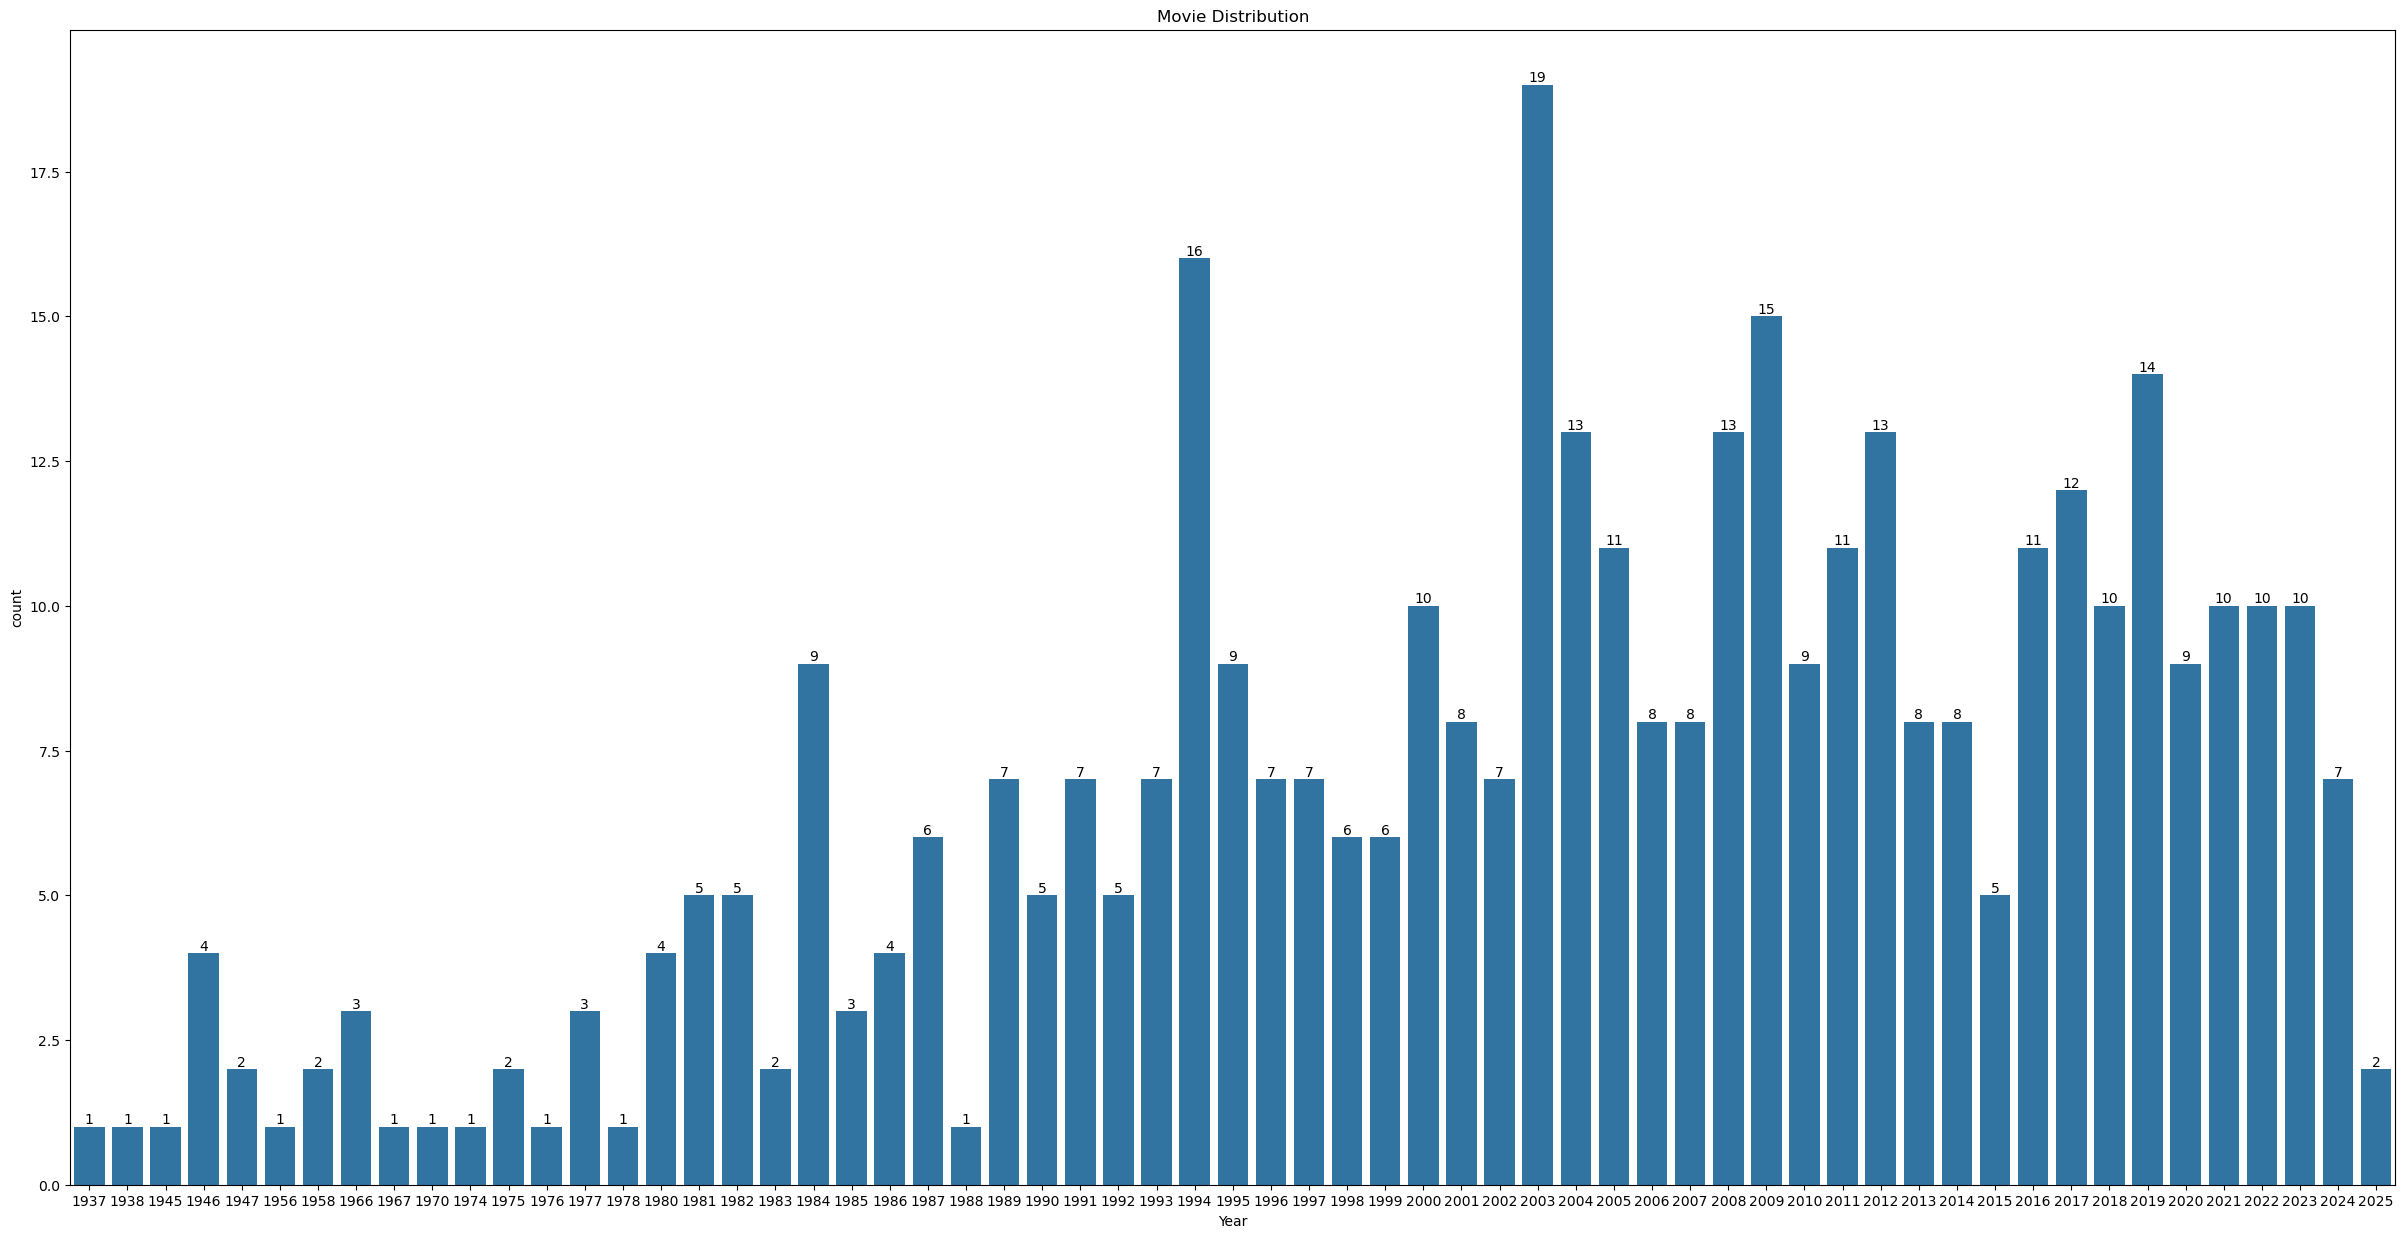

In [7]:
plt.figure(figsize=(30,15))
movieDistribution = sbn.countplot(data=df, x = "Year")
movieDistribution.bar_label(movieDistribution.containers[0])
plt.title("Movie Distribution")
plt.show()

In [8]:
df['Worldwide_Gross'].isnull().sum()
df = df.dropna(subset=['Worldwide_Gross'])

In [9]:
df.head()

,Year,Film,Publisher,Director,Distributor,Worldwide_Gross,Description
9,1956,The Lone Ranger,WXYT (AM),Stuart Heisler,Warner Bros.,"Theatrical ($1,550,000)",Film based on The Lone Ranger television series.
16,1970,Hercules in New York,Original,Arthur Allan Seidelman,RAF Industries,"Theatrical ($300,000)",NaN
19,1975,Dolemite,Original,D'Urville Martin,Dimension Pictures,"Theatrical ($12,000,000)",NaN
21,1977,Star Wars,Original,George Lucas,Walt Disney Studios Motion Pictures (20th Cent...,"Theatrical ($775.8,000,000)",NaN
25,1980,Hero at Large,Original,Martin Davidson,Amazon MGM Studios (Metro-Goldwyn-Mayer),"Theatrical ($15,934,737)",NaN


In [10]:
df['Film'] = df['Film'].str.strip("'")

In [11]:
df.head()

,Year,Film,Publisher,Director,Distributor,Worldwide_Gross,Description
9,1956,The Lone Ranger,WXYT (AM),Stuart Heisler,Warner Bros.,"Theatrical ($1,550,000)",Film based on The Lone Ranger television series.
16,1970,Hercules in New York,Original,Arthur Allan Seidelman,RAF Industries,"Theatrical ($300,000)",NaN
19,1975,Dolemite,Original,D'Urville Martin,Dimension Pictures,"Theatrical ($12,000,000)",NaN
21,1977,Star Wars,Original,George Lucas,Walt Disney Studios Motion Pictures (20th Cent...,"Theatrical ($775.8,000,000)",NaN
25,1980,Hero at Large,Original,Martin Davidson,Amazon MGM Studios (Metro-Goldwyn-Mayer),"Theatrical ($15,934,737)",NaN


In [12]:
df['Worldwide_Gross'] = df['Worldwide_Gross'].str.extract(r"\$([\d,]+)")
df['Worldwide_Gross'] = df['Worldwide_Gross'].str.replace(",", "").astype(float)

In [13]:
df.head(5)

,Year,Film,Publisher,Director,Distributor,Worldwide_Gross,Description
9,1956,The Lone Ranger,WXYT (AM),Stuart Heisler,Warner Bros.,1550000.0,Film based on The Lone Ranger television series.
16,1970,Hercules in New York,Original,Arthur Allan Seidelman,RAF Industries,300000.0,NaN
19,1975,Dolemite,Original,D'Urville Martin,Dimension Pictures,12000000.0,NaN
21,1977,Star Wars,Original,George Lucas,Walt Disney Studios Motion Pictures (20th Cent...,775.0,NaN
25,1980,Hero at Large,Original,Martin Davidson,Amazon MGM Studios (Metro-Goldwyn-Mayer),15934737.0,NaN


## Revenue Trends Over the Years

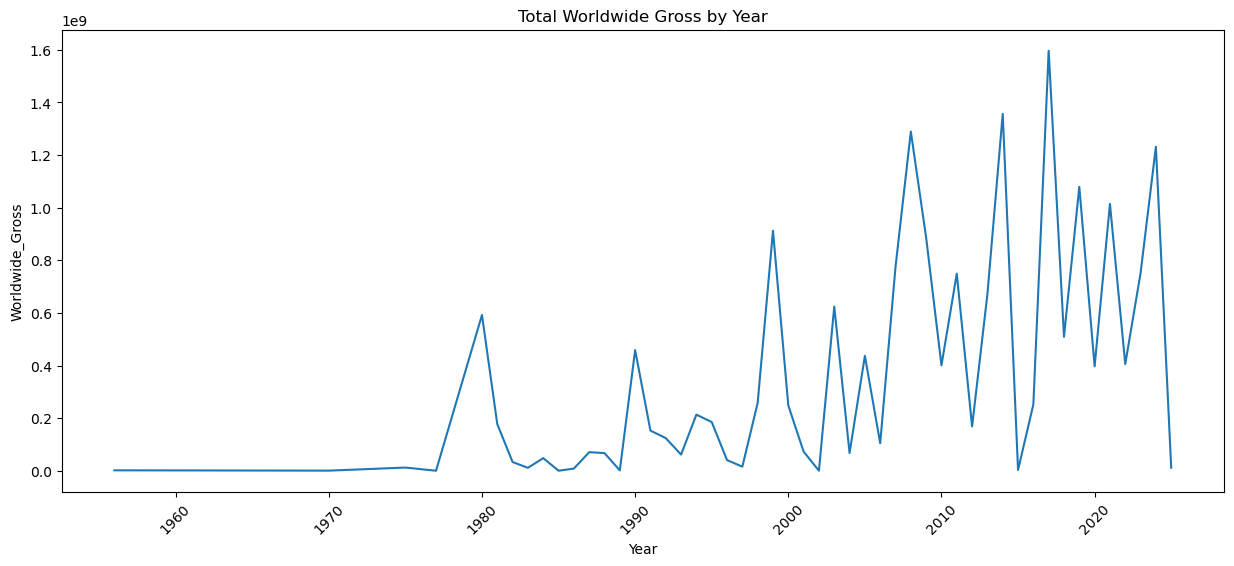

In [14]:
gross_by_year = df.groupby('Year')['Worldwide_Gross'].sum().reset_index()
plt.figure(figsize=(15,6))

sbn.lineplot(data=gross_by_year, x='Year', y='Worldwide_Gross')

plt.title("Total Worldwide Gross by Year")
plt.xticks(rotation=45)
plt.show()

## Top 10 Highest Grossing Movies

In [15]:
top10 = df.sort_values(by='Worldwide_Gross', ascending=False).head(10)
print(top10[['Film', 'Year', 'Worldwide_Gross']])

                                    Film  Year  Worldwide_Gross
252  Transformers: Revenge of the Fallen  2009      836000000.0
228                         Transformers  2007      709000000.0
232                              Hancock  2008      624386746.0
327        Transformers: The Last Knight  2017      605000000.0
400      Godzilla x Kong: The New Empire  2024      571750016.0
325                   Kong: Skull Island  2017      568652812.0
28               The Empire Strikes Back  1980      549000000.0
300                             Godzilla  2014      524976069.0
404                 Sonic the Hedgehog 3  2024      491603986.0
301         Teenage Mutant Ninja Turtles  2014      485004754.0


## Publisher-wise Movie Count

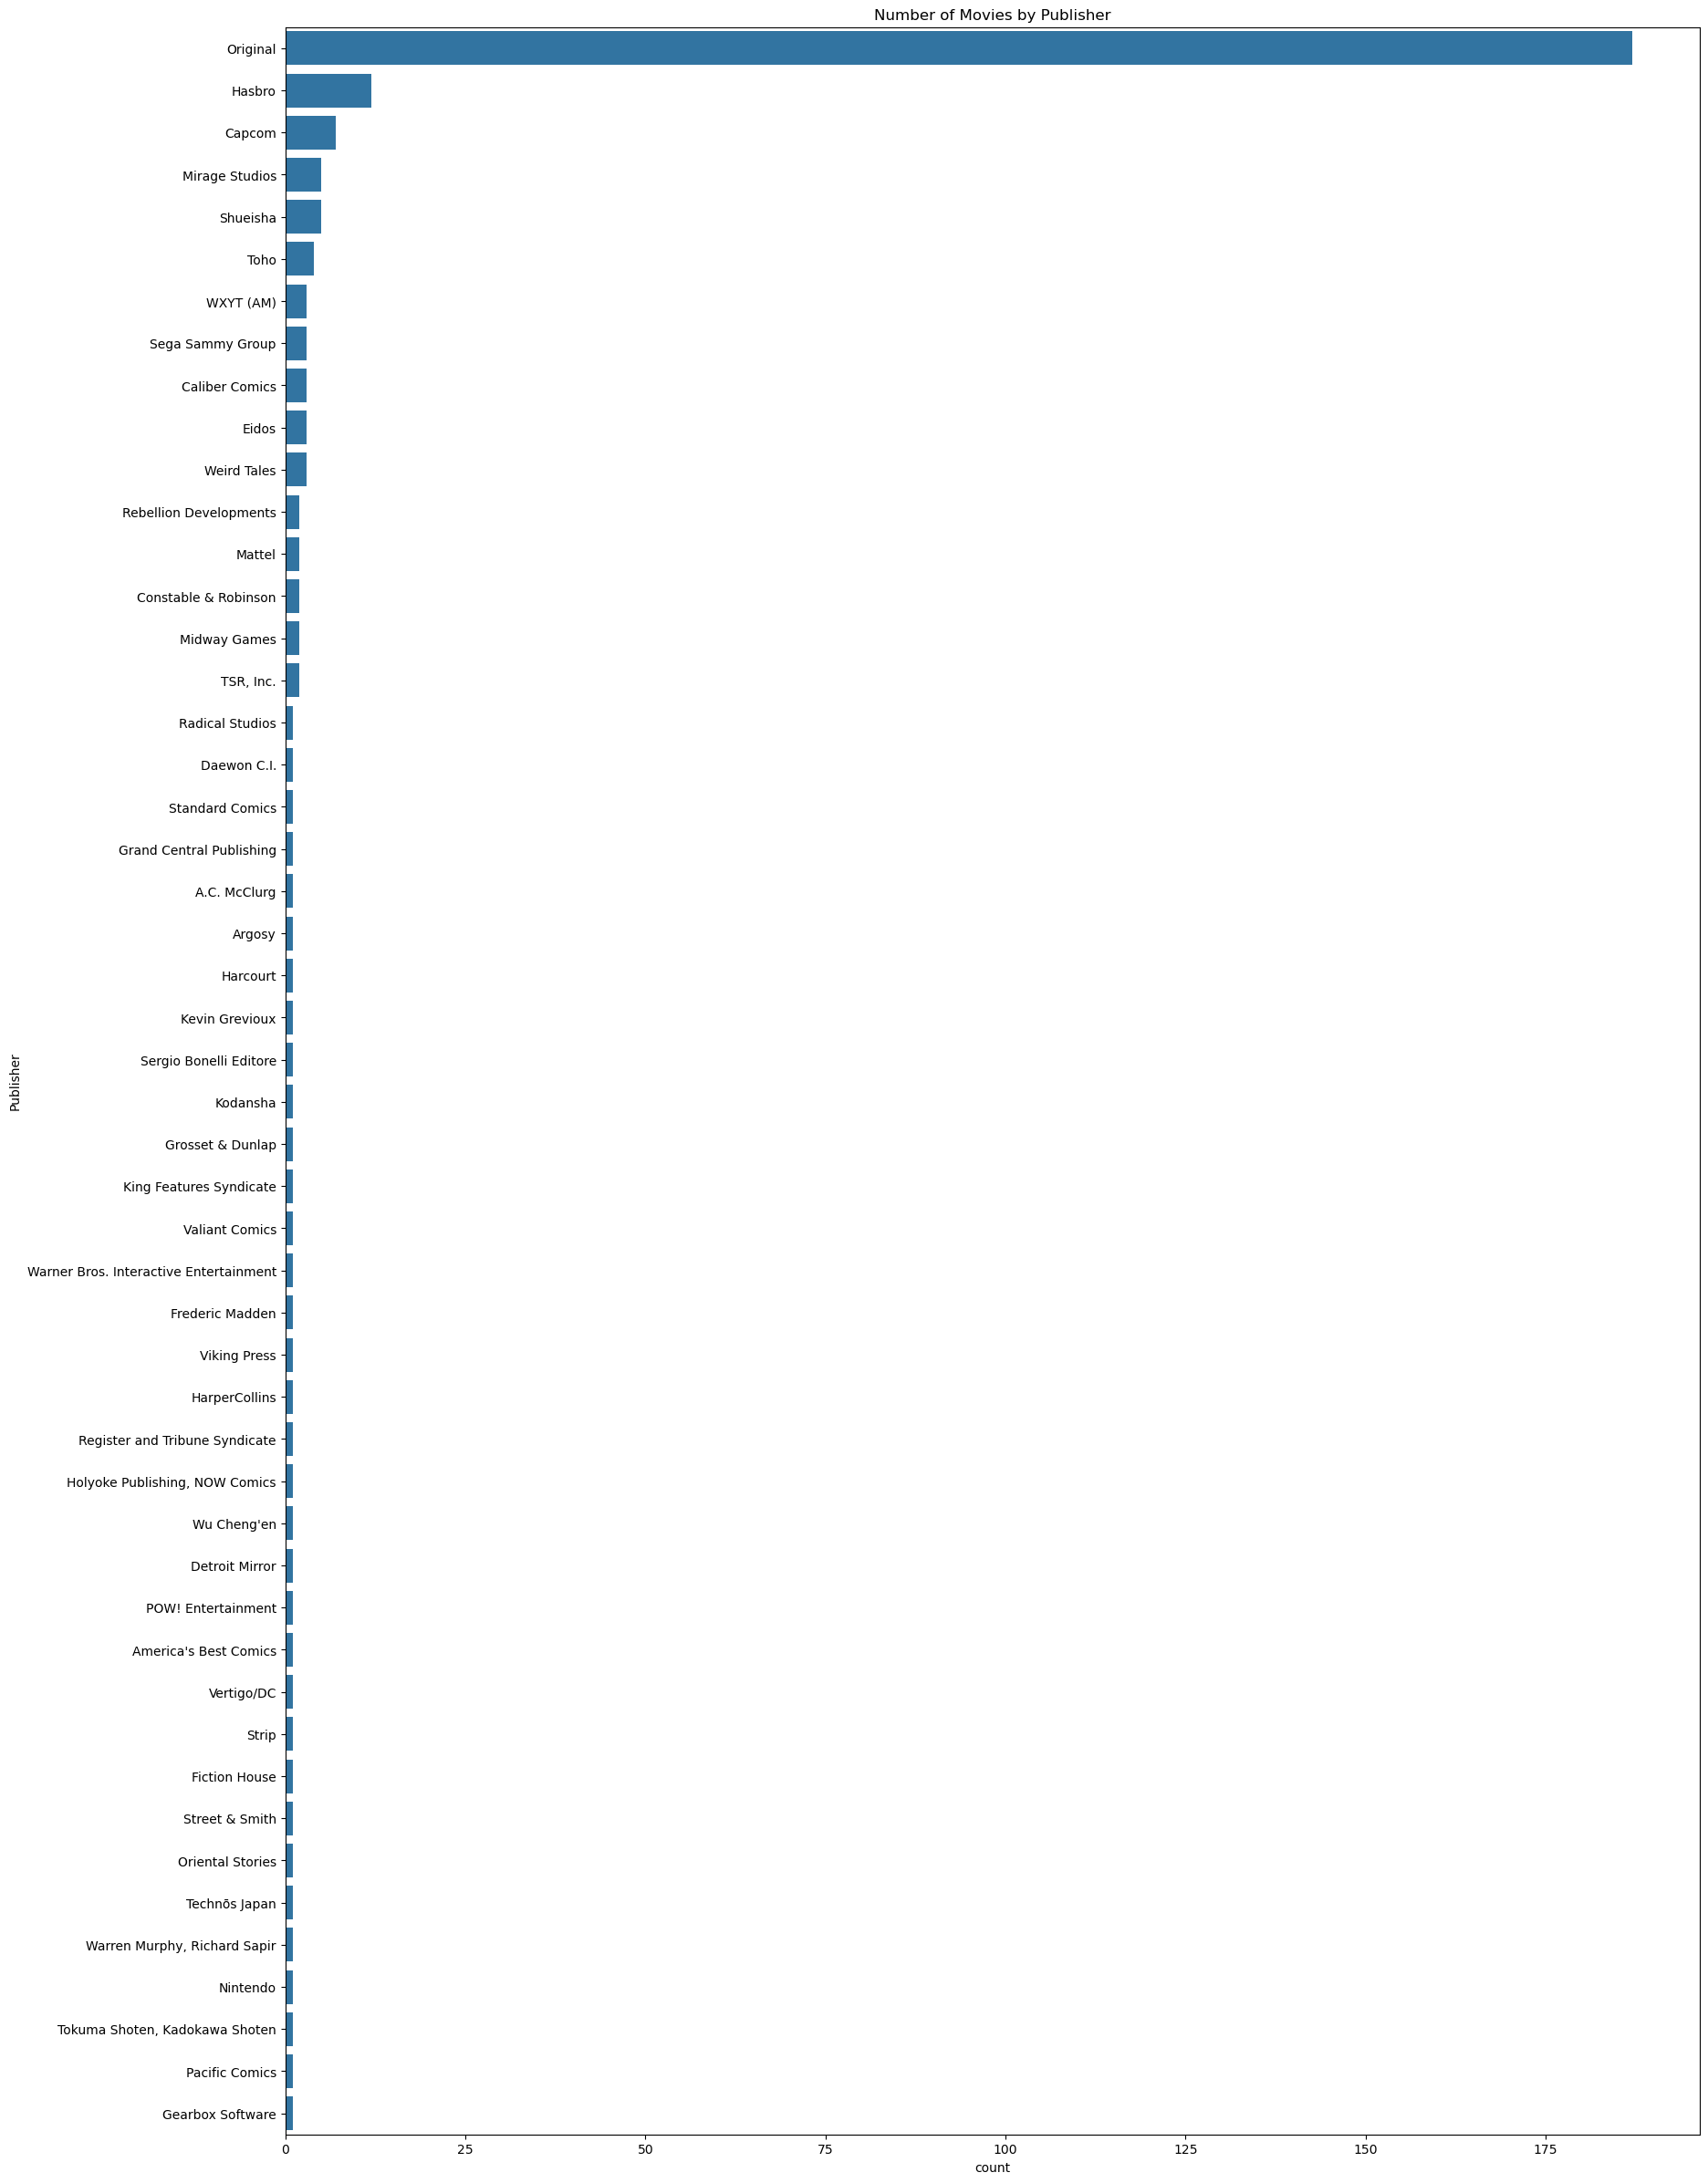

In [21]:
plt.figure(figsize=(20,30))
sbn.countplot(data=df, y='Publisher', order=df['Publisher'].value_counts().index)
plt.title("Number of Movies by Publisher")
plt.show()

## Average Gross per Publisher

In [22]:
pub_avg = df.groupby('Publisher')['Worldwide_Gross'].mean().sort_values(ascending=False)
print(pub_avg)

Publisher
Toho                                      4.885356e+08
Sega Sammy Group                          4.059932e+08
Hasbro                                    2.621258e+08
Holyoke Publishing, NOW Comics            2.278172e+08
Mirage Studios                            2.107050e+08
Detroit Mirror                            1.620000e+08
HarperCollins                             1.498784e+08
Wu Cheng'en                               1.280000e+08
WXYT (AM)                                 9.138928e+07
Shueisha                                  8.189455e+07
Daewon C.I.                               7.830000e+07
Rebellion Developments                    7.748054e+07
Pacific Comics                            6.200000e+07
Caliber Comics                            6.123859e+07
Original                                  4.864312e+07
Street & Smith                            4.806344e+07
Register and Tribune Syndicate            3.903134e+07
Valiant Comics                            3.350284e+07
